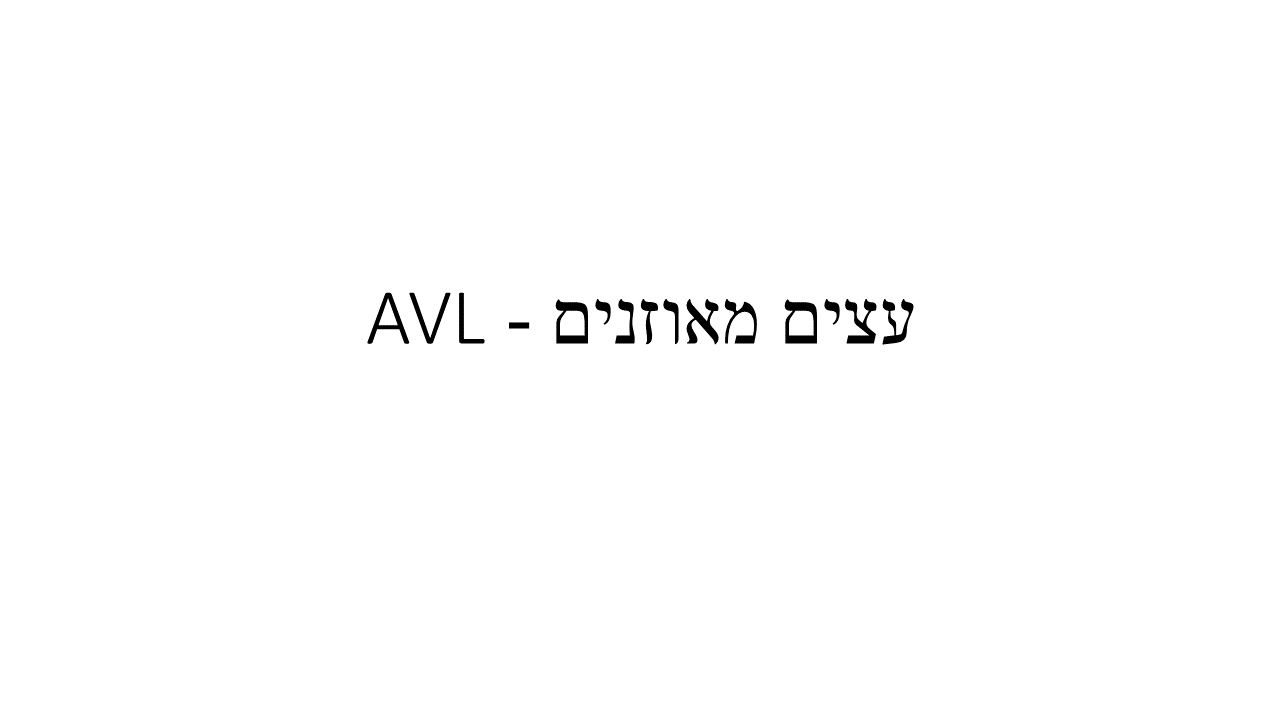

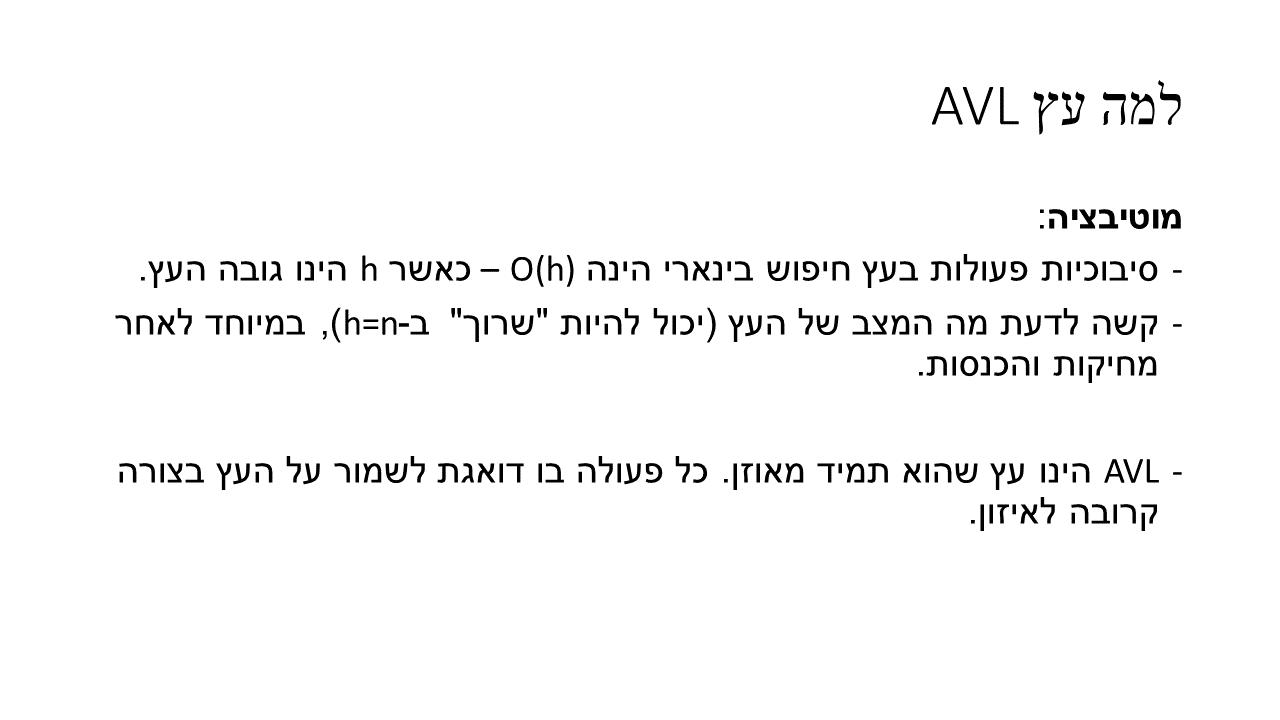

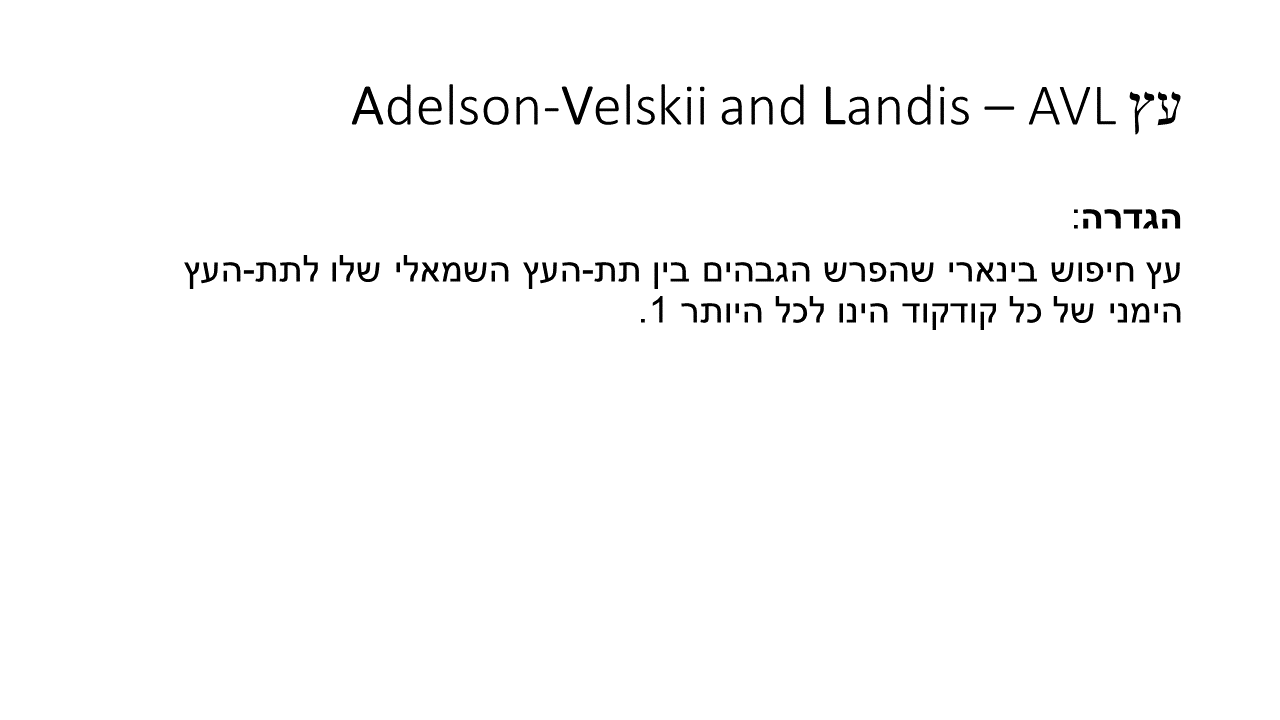

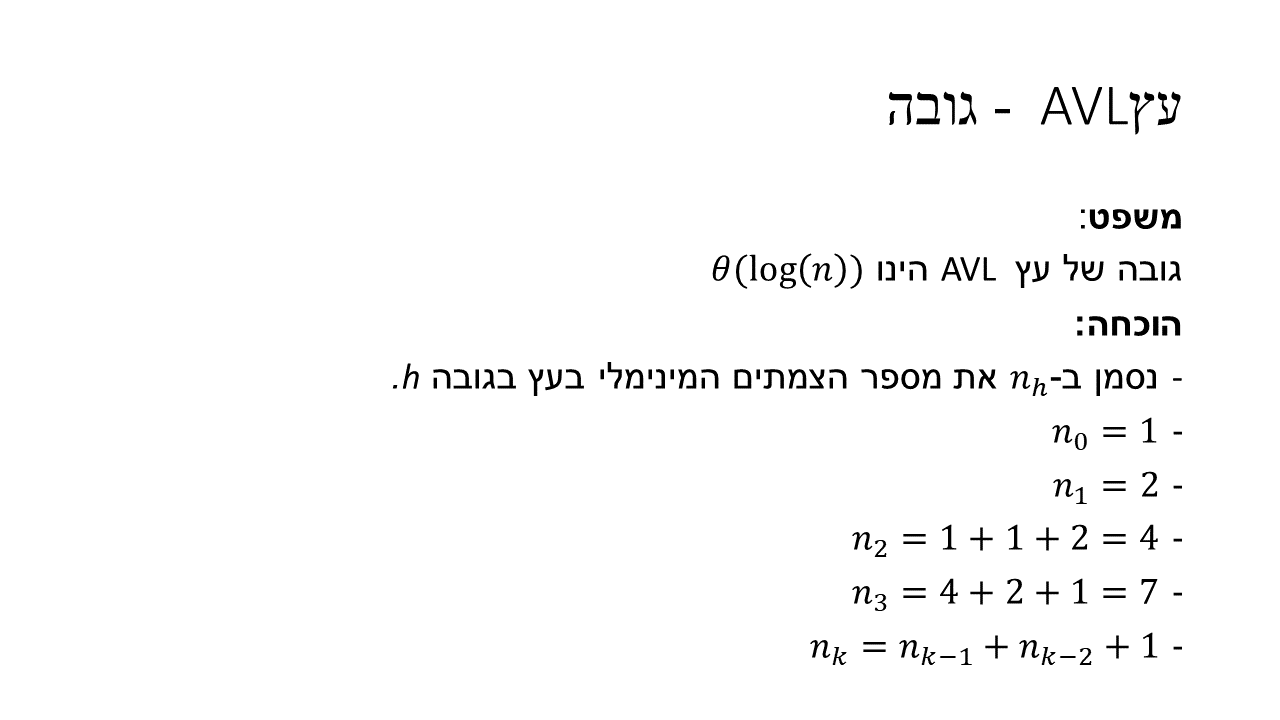

In [1]:
import numpy as np
import pandas as pd
import math
import graphviz 
from IPython.display import display

# full_tree_label = "label = \"Full Binary Tree\" \n"
# full_tree_source = header + "subgraph cluster_full_tree {\n" + full_tree + full_tree_label +  footer

header = "digraph sample {\n"
footer = "}\n"

prefix = "A"

def make_child(parent, child, prefix="A", left=True):
    return prefix + str(parent) + " -> " + prefix + str(child) + "\n" 

def make_node(ind, prefix="A", color="black", label="", shape="circle", xlabel=""):
    if label == "":
        label = str(ind)
    node_str = prefix + str(ind) +"[label=\"" + label + "\" color=" + color + " shape=" + shape
    if xlabel != "":
        node_str += " xlabel=\"" + xlabel + "\""
    node_str += "]\n"
    return node_str 



class Tree:
    header = "digraph sample {\n"
    footer = "}\n"
    prefix = "A"
    subgraph_header = "subgraph "

    def __init__(self, name, nodes_num, prefix=prefix):
        self.name = name
        self.cluster_counter = 0
        self.tree_code = "" 
        self.label = "label = \"" + self.name + "\" \n"
        self.prefix = prefix
        if nodes_num > 0:
            for i in range(nodes_num):
                self.tree_code += make_node(i, prefix=self.prefix)

    def make_node(self, ind, color="black", label="", shape="circle", xlabel=""):
        if label == "":
            label = str(ind)
        self.tree_code += make_node(ind, prefix=self.prefix, color=color, label=label, shape=shape, xlabel=xlabel)
        
    def make_child(self, parent, child):
        self.tree_code += make_child(parent, child, prefix=self.prefix)
            
    def set_subgraph(self, nodes, color="red", counter=-1):
        if counter == -1:
            counter = self.cluster_counter
        self.tree_code += "subgraph cluster_" + self.name + str(self.cluster_counter) + " {\n"
        self.tree_code += ';'.join(self.prefix + str(n) for n in nodes) + "\n"
        self.tree_code += "label = \"N_" + str(counter) + "\"\n" 
        self.tree_code += "graph[color=" + color + "]\n" 
        self.tree_code += "}\n"
        self.cluster_counter += 1

    def get_graph_code(self, subgraph=False, cluster=False):
        if cluster:
            cluster_prefix = "cluster_"
        else:
            cluster_prefix = ""
        if subgraph:
            tree_source = Tree.subgraph_header + cluster_prefix + self.name + " {\n"+ self.tree_code + self.label + footer
        else:
            tree_source = header + self.tree_code + footer
            
        return tree_source
            
    def get_graph(self):
        tree_source = header + self.tree_code + footer
        #print(tree_source)
        gvz = graphviz.Source(tree_source)
        return gvz



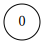

In [2]:
t0 = Tree("", 1)
display(t0.get_graph())

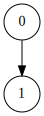

In [3]:
# make nodes
t = Tree("tree", 2)

t.make_child(0, 1)

display(t.get_graph())

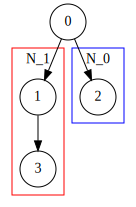

In [4]:
# make nodes
t = Tree("tree", 4)

t.make_child(0, 1)
t.make_child(0, 2)
t.make_child(1, 3)

t.set_subgraph([2], color="blue")
t.set_subgraph([1,3], color="red")

# produce PDF
# t.get_graph().view()
# print (gvz.source)
display(t.get_graph())

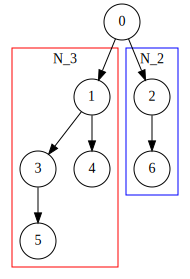

In [5]:
# make nodes
t = Tree("tree", 7)

t.make_child(0, 1)
t.make_child(0, 2)
t.make_child(1, 3)
t.make_child(1, 4)
t.make_child(3, 5)
t.make_child(2, 6)

t.set_subgraph([2, 6], color="blue", counter=2)
t.set_subgraph([1,3, 4, 5], color="red", counter=3)

# produce PDF
# t.get_graph().view()
# print (gvz.source)
display(t.get_graph())

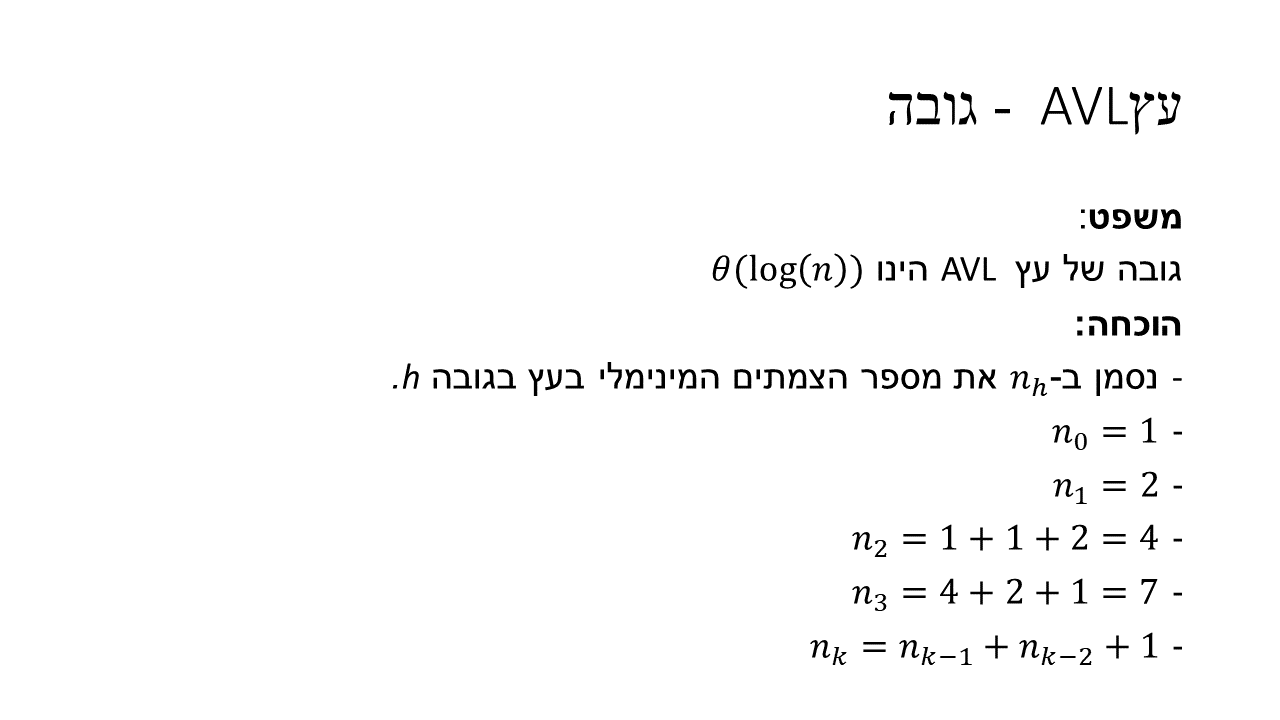

$$n_k \geq n_{k-1} $$
$$n_k \geq 2 n_{k-2} +1 > 2 n_{k-2} $$

$$ n_h \geq 2 n_{k-2} \geq 4 n_{k-4} \ldots \geq 2^{h/2} $$

Given a tree with n nodes and height h:

$$ n \geq n_h \geq 2^{h/2} $$ 

$$ 2 log(n) \geq h $$ 

$$ h = O(log(n)) $$

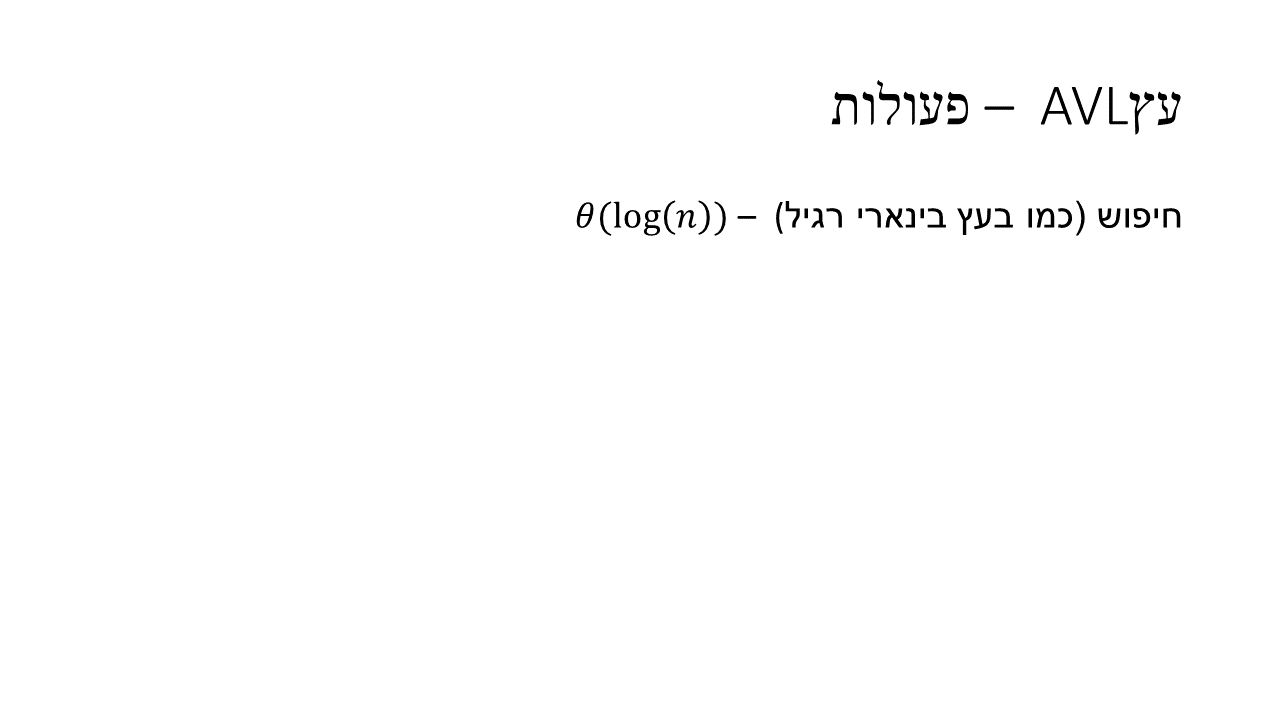

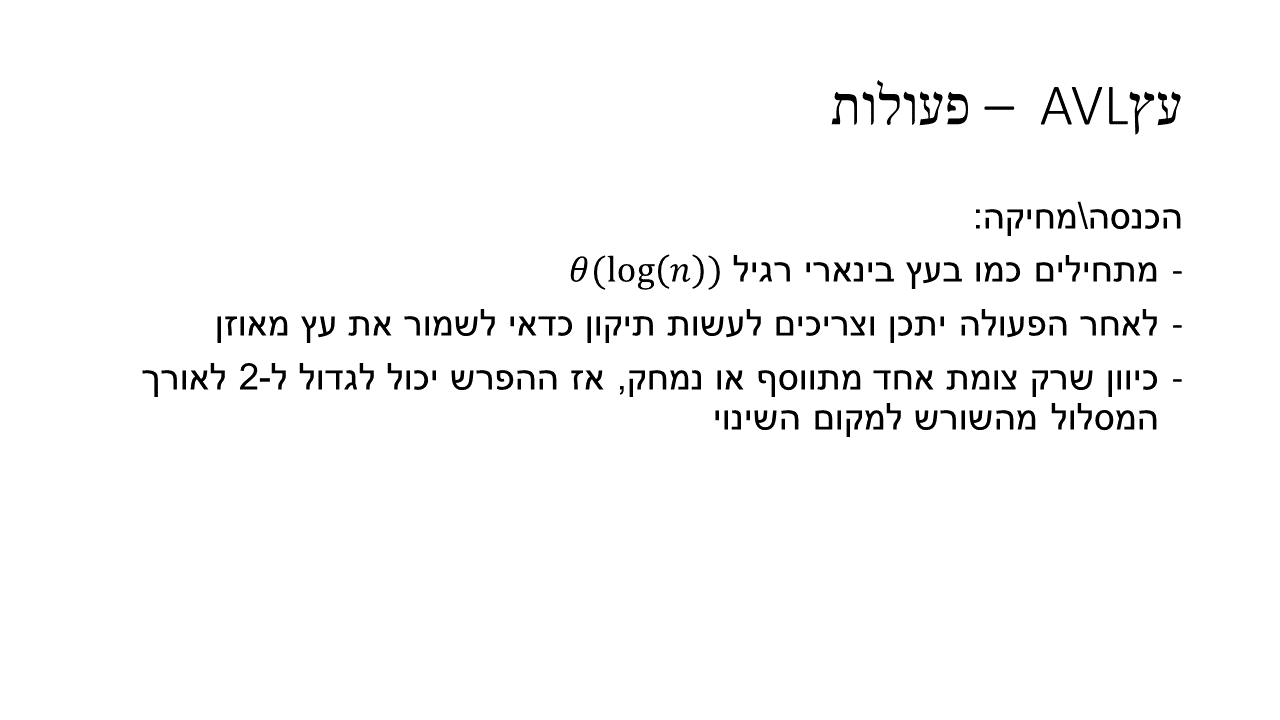

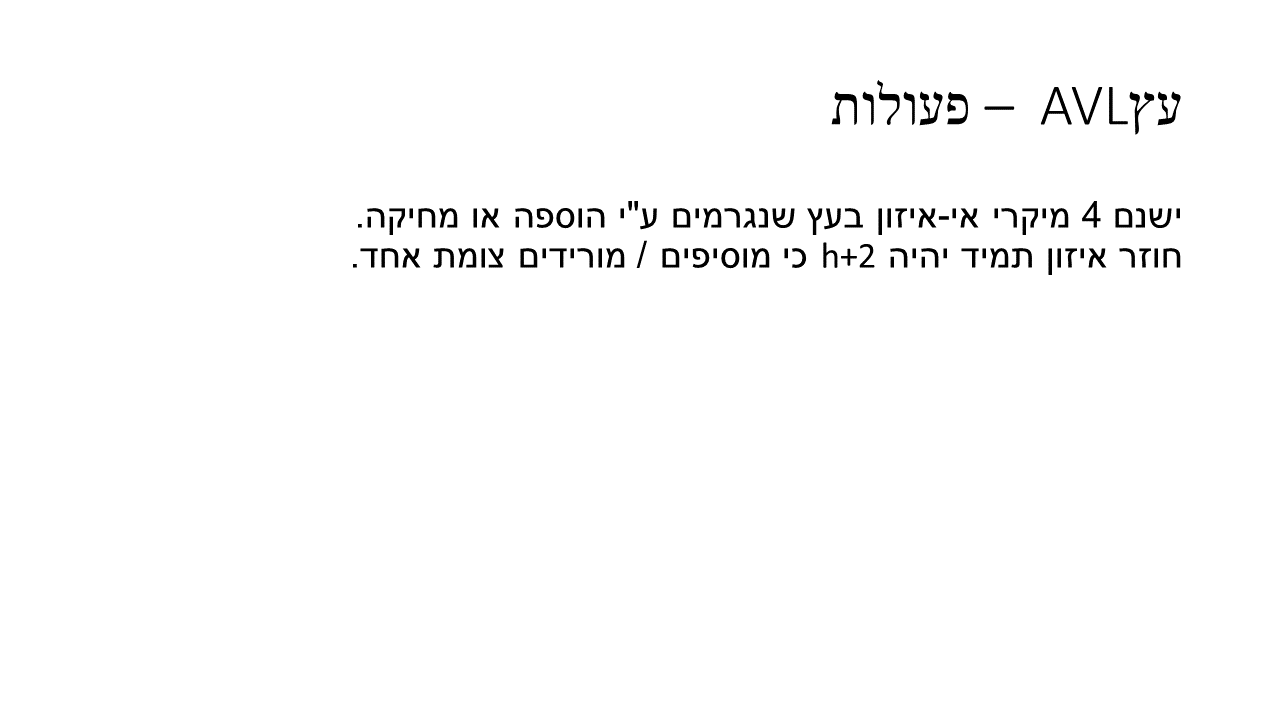

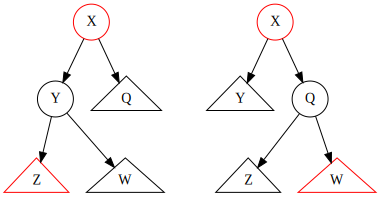

In [6]:
t = Tree("tree", 0, prefix="L")

t.make_node(0, label="X", color="red")
t.make_node(1, label="Y")
t.make_node(2, label="Z", shape="triangle", color="red")
t.make_node(3, label="W", shape="triangle")
t.make_node(4, label="Q", shape="triangle")


t.make_child(0, 1)
t.make_child(0, 4)
t.make_child(1, 2)
t.make_child(1, 3)
# display(t.get_graph())

left_graph = t.get_graph_code(True)

rt = Tree("tree", 0, prefix="R")

rt.make_node(0, label="X", color="red")
rt.make_node(1, label="Y", shape="triangle")
rt.make_node(2, label="Z", shape="triangle")
rt.make_node(3, label="W", shape="triangle", color="red")
rt.make_node(4, label="Q")

rt.make_child(0, 4)
rt.make_child(0, 1)
rt.make_child(4, 2)
rt.make_child(4, 3)
right_graph = rt.get_graph_code(True)

tree_source = header + left_graph + right_graph + footer
display(graphviz.Source(tree_source))

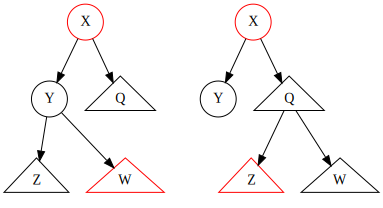

In [7]:
lit = Tree("tree", 0, prefix="LI")

lit.make_node(0, label="X", color="red")
lit.make_node(1, label="Y")
lit.make_node(2, label="Z", shape="triangle")
lit.make_node(3, label="W", shape="triangle", color="red")
lit.make_node(4, label="Q", shape="triangle")


lit.make_child(0, 1)
lit.make_child(0, 4)
lit.make_child(1, 2)
lit.make_child(1, 3)
li_tree = lit.get_graph_code(True)

rit = Tree("tree", 0, prefix="RI")

rit.make_node(0, label="X", color="red")
rit.make_node(1, label="Y")
rit.make_node(2, label="Z", shape="triangle", color="red")
rit.make_node(3, label="W", shape="triangle")
rit.make_node(4, label="Q", shape="triangle")

rit.make_child(0, 4)
rit.make_child(0, 1)
rit.make_child(4, 2)
rit.make_child(4, 3)
ri_tree = rit.get_graph_code(True)

in_tree_source = header + li_tree + ri_tree + footer
display(graphviz.Source(in_tree_source))

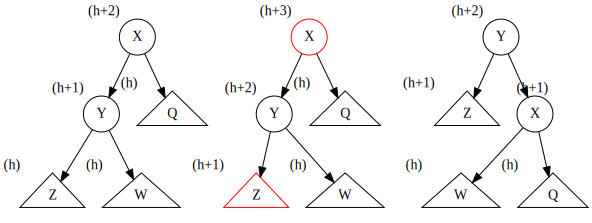

In [8]:
########################################################
# original
t0 = Tree("Original", 0, prefix="T0")

t0.make_node(0, label="X", xlabel="(h+2)")
t0.make_node(1, label="Y", xlabel="(h+1)")
t0.make_node(2, label="Z", xlabel="(h)", shape="triangle")
t0.make_node(3, label="W", xlabel="(h)", shape="triangle")
t0.make_node(4, label="Q", xlabel="(h)", shape="triangle")

t0.make_child(0, 1)
t0.make_child(0, 4)
t0.make_child(1, 2)
t0.make_child(1, 3)
# display(t.get_graph())

t0_graph = t0.get_graph_code(True)

########################################################
# after insert
t1 = Tree("AfterInsert", 0, prefix="T1")

t1.make_node(0, label="X", xlabel="(h+3)", color="red")
t1.make_node(1, label="Y", xlabel="(h+2)")
t1.make_node(2, label="Z", xlabel="(h+1)", shape="triangle", color="red")
t1.make_node(3, label="W", xlabel="(h)", shape="triangle")
t1.make_node(4, label="Q", xlabel="(h)", shape="triangle")


t1.make_child(0, 1)
t1.make_child(0, 4)
t1.make_child(1, 2)
t1.make_child(1, 3)
# display(t.get_graph())

t1_graph = t1.get_graph_code(True)


########################################################
# after rotation
t2 = Tree("AfterRotate", 0, prefix="T2")

t2.make_node(0, label="Y", xlabel="(h+2)")
t2.make_node(1, label="Z", xlabel="(h+1)", shape="triangle")
t2.make_node(2, label="X", xlabel="(h+1)")
t2.make_node(3, label="W", xlabel="(h)", shape="triangle")
t2.make_node(4, label="Q", xlabel="(h)", shape="triangle")

t2.make_child(0, 1)
t2.make_child(0, 2)
t2.make_child(2, 3)
t2.make_child(2, 4)
# display(t.get_graph())

t2_graph = t2.get_graph_code(True)
####################################################
tree_source = header + t0_graph +  t1_graph + t2_graph + footer

display(graphviz.Source(tree_source))

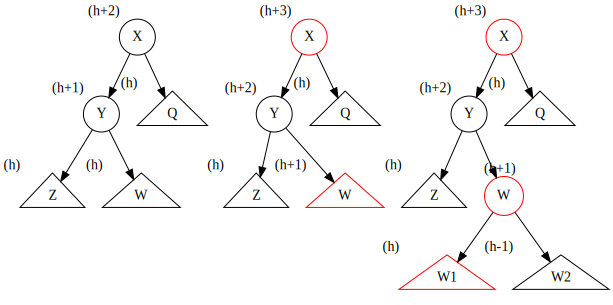

In [9]:
########################################################
# original
it0 = Tree("Original", 0, prefix="IT0")

it0.make_node(0, label="X", xlabel="(h+2)")
it0.make_node(1, label="Y", xlabel="(h+1)")
it0.make_node(2, label="Z", xlabel="(h)", shape="triangle")
it0.make_node(3, label="W", xlabel="(h)", shape="triangle")
it0.make_node(4, label="Q", xlabel="(h)", shape="triangle")


it0.make_child(0, 1)
it0.make_child(0, 4)
it0.make_child(1, 2)
it0.make_child(1, 3)
it0_tree = it0.get_graph_code(True)
########################################################
# after insert
it1 = Tree("AfterInsert", 0, prefix="IT1")

it1.make_node(0, label="X", xlabel="(h+3)", color="red")
it1.make_node(1, label="Y", xlabel="(h+2)")
it1.make_node(2, label="Z", xlabel="(h)", shape="triangle")
it1.make_node(3, label="W", xlabel="(h+1)", shape="triangle", color="red")
it1.make_node(4, label="Q", xlabel="(h)", shape="triangle")


it1.make_child(0, 1)
it1.make_child(0, 4)
it1.make_child(1, 2)
it1.make_child(1, 3)
it1_tree = it1.get_graph_code(True)
########################################################
# after rotate
it2 = Tree("BeforeRotate", 0, prefix="IT2")

it2.make_node(0, label="X", xlabel="(h+3)", color="red")
it2.make_node(1, label="Y", xlabel="(h+2)")
it2.make_node(2, label="Z", xlabel="(h)", shape="triangle")
it2.make_node(3, label="W", xlabel="(h+1)", color="red")
it2.make_node(4, label="Q", xlabel="(h)", shape="triangle")
it2.make_node(5, label="W1", xlabel="(h)", shape="triangle", color="red")
it2.make_node(6, label="W2", xlabel="(h-1)", shape="triangle")


it2.make_child(0, 1)
it2.make_child(0, 4)
it2.make_child(1, 2)
it2.make_child(1, 3)
it2.make_child(3, 5)
it2.make_child(3, 6)
it2_tree = it2.get_graph_code(True)

####################################################
tree_source = header + it0_tree +  it1_tree + it2_tree + footer

display(graphviz.Source(tree_source))

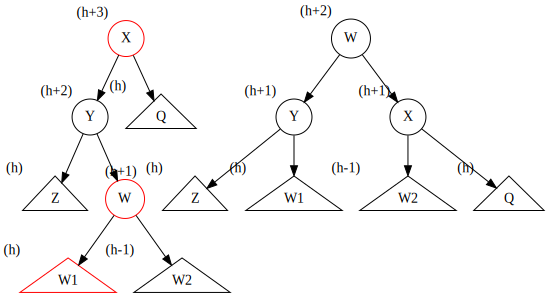

In [10]:
########################################################
# after insert
it3 = Tree("AfterDoubleRotate", 0, prefix="IT3")

it3.make_node(3, label="W", xlabel="(h+2)")
it3.make_node(1, label="Y", xlabel="(h+1)")
it3.make_node(0, label="X", xlabel="(h+1)")
it3.make_node(2, label="Z", xlabel="(h)", shape="triangle")
it3.make_node(5, label="W1", xlabel="(h)", shape="triangle")
it3.make_node(6, label="W2", xlabel="(h-1)", shape="triangle")
it3.make_node(4, label="Q", xlabel="(h)", shape="triangle")

it3.make_child(3, 1)
it3.make_child(3, 0)
it3.make_child(1, 2)
it3.make_child(1, 5)
it3.make_child(0, 6)
it3.make_child(0, 4)
it3_tree = it3.get_graph_code(True)
####################################################

dr_tree = header + it2_tree + it3_tree + footer

display(graphviz.Source(dr_tree))

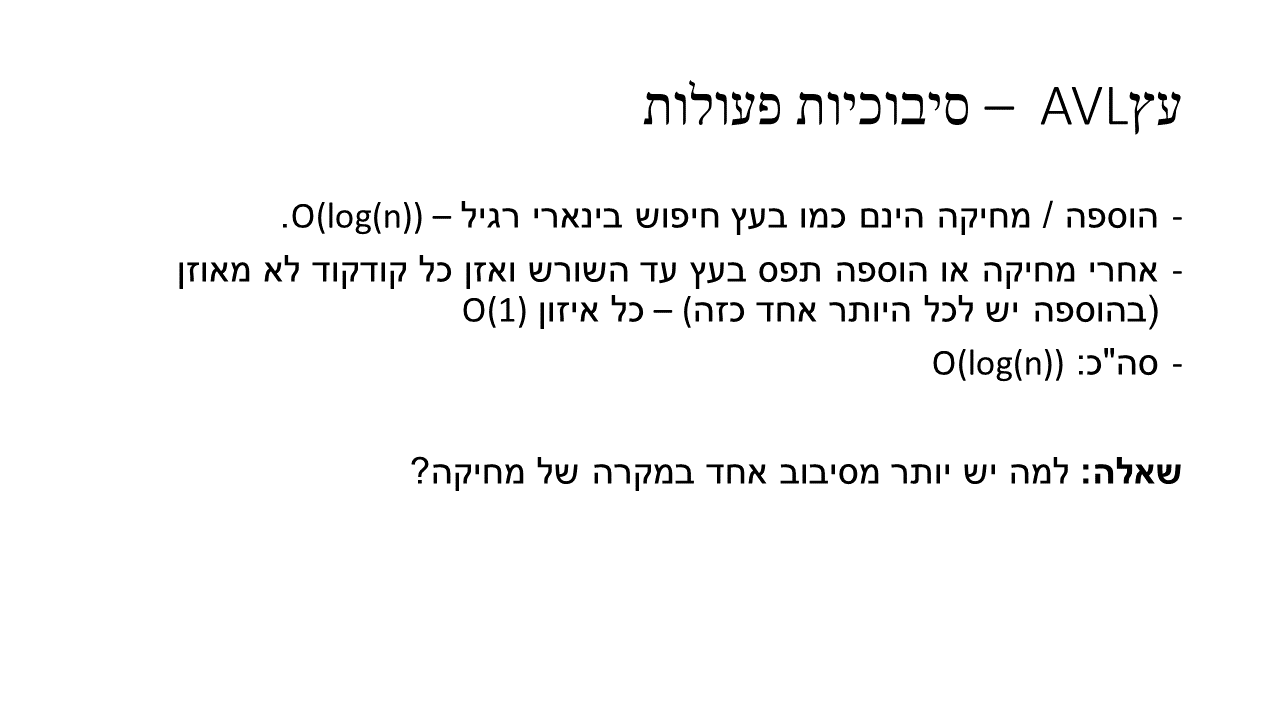